In [11]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import lightkurve as lk
from scipy.optimize import curve_fit
import pandas as pd

In [12]:
TIC = 'TIC 3034524'

data_all = lk.search_lightcurve(TIC, author='SPOC')

data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,SPOC,120,3034524,0.0
1,TESS Sector 43,2021,SPOC,120,3034524,0.0
2,TESS Sector 44,2021,SPOC,120,3034524,0.0
3,TESS Sector 45,2021,SPOC,120,3034524,0.0
4,TESS Sector 59,2022,SPOC,120,3034524,0.0


<IPython.core.display.Javascript object>


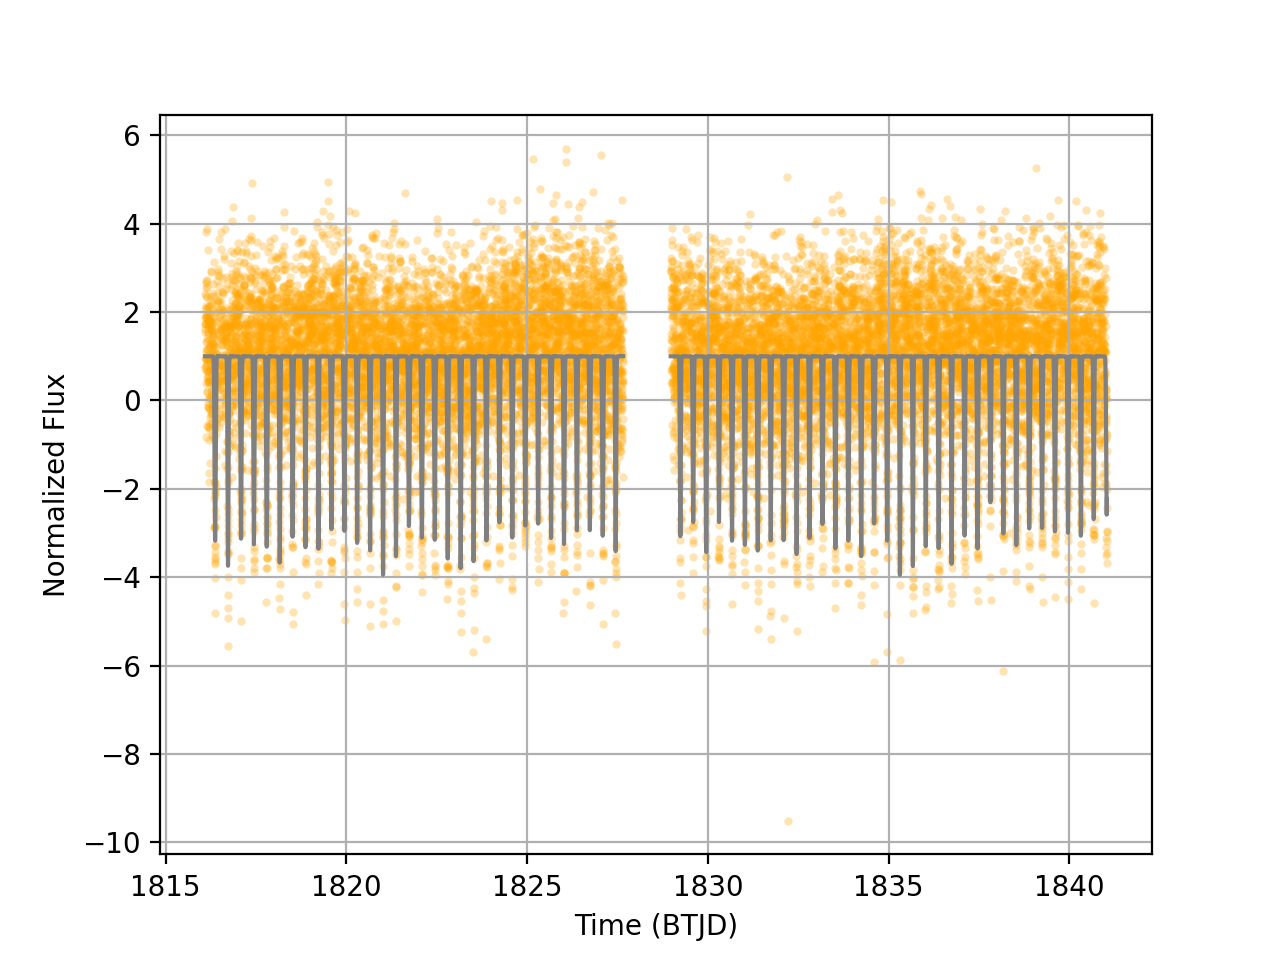


Parameters and their errors 1 :
A = 4.1716777873901 +/- 0.29798204906535125
mu = 1816.3674675203056 +/- 0.001561168961553978
Sigma = -0.015716908991337937 +/- 0.0015546743764688058 


Parameters and their errors 2 :
A = 4.739490462641891 +/- 0.3034953191767027
mu = 1816.7235476571118 +/- 0.0009941855393484167
Sigma = 0.013390944968908466 +/- 0.0010078691011553423 


Parameters and their errors 3 :
A = 4.125801532065076 +/- 0.313320928655132
mu = 1817.0831147889087 +/- 0.001240887513715258
Sigma = 0.014156798505311 +/- 0.0012409002075142535 


Parameters and their errors 4 :
A = 4.257210186786238 +/- 0.3286077095529222
mu = 1817.4400230323602 +/- 0.0011953119891357298
Sigma = -0.013560709992175027 +/- 0.0011622079298406055 


Parameters and their errors 5 :
A = 4.307388863713535 +/- 0.28337443036495485
mu = 1817.7957560678342 +/- 0.001175239907814187
Sigma = -0.01519194440055514 +/- 0.0011929889285097021 


Parameters and their errors 6 :
A = 4.667776494154715 +/- 0.3063295307452484
mu

/Users/valegarcia/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Parameters and their errors 33 :
A = -21.34148276419816 +/- inf
mu = 1827.1284595925902 +/- inf
Sigma = -0.012096226868066384 +/- inf 


Parameters and their errors 35 :
A = 4.07015229087043 +/- 0.3548560510438857
mu = 1829.2378797621068 +/- 0.0012571486765765225
Sigma = -0.012489075855780709 +/- 0.001262699622142649 


Parameters and their errors 36 :
A = 3.750419571389353 +/- 0.34571491638976415
mu = 1829.593261952776 +/- 0.0013723519270832328
Sigma = -0.013487494465039386 +/- 0.0014021045624999044 


Parameters and their errors 37 :
A = 4.429645570059697 +/- 0.3157642139189518
mu = 1829.9504189244067 +/- 0.0010497351539314399
Sigma = 0.012747684434221624 +/- 0.0010497345520768947 


Parameters and their errors 38 :
A = 3.749720962304218 +/- 0.34204350372606246
mu = 1830.3064700398288 +/- 0.0013761308385276155
Sigma = -0.013058855598189388 +/- 0.0013761300884356968 


Parameters and their errors 39 :
A = 4.172175329673361 +/- 0.3294036212350039
mu = 1830.6679886060042 +/- 0.00120250

In [25]:
import matplotlib.pyplot as plt

data = data_all[0]
lc = data.download_all().stitch()

# Define the Gaussian function
def gaussian_function(x, A, mu, sigma):
    return -(A * np.exp(-((x - mu)**2) / (2 * sigma**2))-1)

def process_chunk(start_index, end_index, mu_fit):
    Times = lc.time[start_index:end_index]
    t = Time(Times)
    x = np.array(t.btjd)
    y = np.array(lc.flux[start_index:end_index])
    
    # Remove invalid values (infs and NaNs) from y and x arrays
    mask_valid = ~np.isnan(y) & ~np.isinf(y)
    x = x[mask_valid]
    y = y[mask_valid]
    
    while len(x) > 3:
        # Fitting the curve to the data
        initial_guess = [10, mu_fit, 0.17]
        params, covariance = curve_fit(gaussian_function, x, y, p0=initial_guess)

        # Get fitted values for A, μ and σ
        A_fit, mu_fit, sigma_fit = params

        # Get the diagonals of the covariance matrix as the variances of A, μ and σ
        var_A_fit, var_mu_fit, var_sigma_fit = np.diag(covariance)

        # Create points for the fitted curve
        x_fit = np.linspace(min(x), max(x), 1000)
        y_fit = gaussian_function(x_fit, A_fit, mu_fit, sigma_fit)

        # Calculate the errors as the square root of the variances
        error_A_fit = np.sqrt(var_A_fit)
        error_mu_fit = np.sqrt(var_mu_fit)
        error_sigma_fit = np.sqrt(var_sigma_fit) 
        
        plt.scatter(x, y, linewidth = 0, marker = '.', color = 'orange', alpha = 0.3)
        plt.plot(x_fit, y_fit, color='gray')
        plt.xlabel('Time (BTJD)')
        plt.ylabel('Normalized Flux')
        plt.grid(True)
        plt.show()
        
        print("\nParameters and their errors", i, ":")
        print("A =", A_fit, "+/-", error_A_fit)
        print("mu =", mu_fit, "+/-", error_mu_fit)
        print("Sigma =", sigma_fit, "+/-", error_sigma_fit, "\n")
        
        mu_fit_values.append(mu_fit)
        error_mu_fit_values.append(error_mu_fit)

        return mu_fit
    
    if len(x) <= 3:
        mu_guess=1829
        initial_guess = [A_guess, mu_guess, sigma_guess]
        mu_fit = initial_guess[1]

        return mu_fit

# Define initial guesses for A, mu, and sigma
A_guess = 10
mu_guess = 1816.3
sigma_guess = 0.17

# Create the initial_guess list
initial_guess = [A_guess, mu_guess, sigma_guess]

# Get the period in julian days
period_julian_days = 0.357452436602186

# Initialize mu_fit with the initial guess value for mu
mu_fit = initial_guess[1]

# Initialize lists for mu_fit and error_mu_fit values
mu_fit_values = []
error_mu_fit_values = []

# Iterate through the light curve and process chunks of data with the given period
start_index = 0
i=1
while start_index < len(lc):
    end_time = lc.time[start_index] + period_julian_days
    end_index = np.searchsorted(lc.time, end_time, side='right')
    
    # Call process_chunk with the updated mu_fit value
    mu_fit = process_chunk(start_index, end_index, mu_fit)
    mu_fit = mu_fit + period_julian_days
    
    # Update the start_index for the next iteration
    start_index = end_index
    i=i+1 

In [26]:
###O-C Diagram and necessary data tables
##Make sure you change the directory of the downloaded data files or comment it out for this to run properly
##For every Object we will have to change the period, and the initial guesses manually

import matplotlib.pyplot as plt

#Print O values data table 

o_values = mu_fit_values
o_values_errors = error_mu_fit_values
df = pd.DataFrame({'O Values': o_values, 'O Values Errors': o_values_errors})
print(df)

# Given observed times (O) of minima for an eclipsing binary
observed_times = np.array(o_values)

T0 = mu_fit_values [0]  # The first mu_fit is T0
P = period_julian_days  # Period of the eclipsing binar

# Calculate the epoch (E) for each mu_fit (O) value
epochs = np.round((mu_fit_values - T0) / P)

# Calculate the calculated times (C) using the linear ephemeris model
calculated_times = T0 + P * epochs

# Calculate the O-C values
oc_values = mu_fit_values - calculated_times

# Plotting the O-C diagram
plt.scatter(calculated_times, oc_values, marker='.', color='b')
plt.xlabel('Calculated Values')
plt.ylabel('O-C Value')
plt.ylim([-0.005, 0.005])
plt.title('O-C Diagram')
plt.grid(True)
plt.show()

# Create a DataFrame to store the results
oc_data_table_1 = pd.DataFrame({'mu_fit': mu_fit_values,'Epochs': epochs,'Calculated Times': calculated_times,'O-C Values': oc_values})

# Display the O-C DataFrame
print(oc_data_table_1)


       O Values  O Values Errors
0   1816.367468         0.001561
1   1816.723548         0.000994
2   1817.083115         0.001241
3   1817.440023         0.001195
4   1817.795756         0.001175
..          ...              ...
62  1839.601760         0.001405
63  1839.962297         0.001240
64  1840.319380         0.001265
65  1840.675441         0.001484
66  1841.033579         0.004612

[67 rows x 2 columns]
         mu_fit  Epochs  Calculated Times  O-C Values
0   1816.367468     0.0       1816.367468    0.000000
1   1816.723548     1.0       1816.724920   -0.001372
2   1817.083115     2.0       1817.082372    0.000742
3   1817.440023     3.0       1817.439825    0.000198
4   1817.795756     4.0       1817.797277   -0.001521
..          ...     ...               ...         ...
62  1839.601760    65.0       1839.601876   -0.000116
63  1839.962297    66.0       1839.959328    0.002969
64  1840.319380    67.0       1840.316781    0.002599
65  1840.675441    68.0       1840.674233